Lab Entry 1
Currently, I have spent most of my time working with and modifying my data to have it woek effectviley with my model.UNfortunatley, this has proven to be quite challenging so the amount of progress I have made is not ideal. However, I believe once I focus on only the players that do not have NaN values. This will get smoother. I plan to create visualizations and get my inital version of my model working by the end of this weekend. My next report will have much more done.

Lab Entry 2
This session a built and fine tuned my classification models and anlyzed their results. I am quite pleased with how they turned out and found many of the results to be believeable. It was clear the models with the lower percision allowed many players that I would not consider to be hall of famers yet, but have a shot based on their careers. KNN and Random Forest proved to be the best models in my opinion. As a Caps fan I loved my perceptron model becasue it predicted both Backstrom and Ovechkin as Hall of Famers, which I with no bias agree on. I used kmeans clustering to see if there were any clusters with more hall of famers than others. This proved most interesting and also showed the greatness of Wayne Gretsky. I have to now make my visualizations for my data set to give more of a story for my data. I also want to attempt to use a neural network as a classifier out of curriousity. 

Lab Entry 3:
  I have been working on creating some appealing visualizations to show trends in my data set to see why my classification model chooses certain players as Hall of Famers. I have been using quite a lot of bar graphs and scatter plots as they seem to work the best with the comparison of statistics. I also decided to analyze the training data predictions to observe what retired players that are not in the HOF are being predicted as Hall of Famers. This furthe increases the scope of players I can talk about within my analysis, as I began to notice many players that show up on my graphs that are not in the Hall of Fame. All I have left to complete is the visualizations. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
csv = 'test_nhl.csv'
skaters_df = pd.read_csv(csv)
skaters_df.head(5)

,Player,From,To,Pos,GP,G,A,PTS,+/-,PIM,...,PowerPlayA,SH.1,S,S%,TOI,ATOI,OPS,DPS,GPS,PS
0,Antti Aalto\aaltoan01,1998,2001,C,151,11,17,28,-25.0,52.0,...,1.0,0.0,182.0,6.0,1643.0,11:06,-0.6,0.9,0.0,0.4
1,Reg Abbott\abbotre01,1953,1953,C,3,0,0,0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,-0.1,0.1,0.0,-0.1
2,Spencer Abbott\abbotsp01,2014,2017,LW,2,0,0,0,-2.0,0.0,...,0.0,0.0,3.0,0.0,14.0,6:55,0.0,-0.1,0.0,-0.1
3,Justin Abdelkader\abdelju01,2008,2020,LW,739,106,146,252,-56.0,608.0,...,23.0,2.0,1238.0,8.6,11010.0,14:54,8.4,10.5,0.0,18.9
4,Clarence Abel\abelcl01,1927,1934,D,333,20,18,38,NaN,365.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.7,31.4,0.0,32.0


In [ ]:
skaters_df = skaters_df.dropna()

In [ ]:
names = skaters_df['Player'].values
HOF_val = []
for name in names:
  if '*' in name:
    HOF_val.append("Yes")
  else:
    HOF_val.append("No")

skaters_df["Hall of Fame"] = HOF_val
skaters_df

,Player,From,To,Pos,GP,G,A,PTS,+/-,PIM,...,SH.1,S,S%,TOI,ATOI,OPS,DPS,GPS,PS,Hall of Fame
0,Antti Aalto\aaltoan01,1998,2001,C,151,11,17,28,-25.0,52.0,...,0.0,182.0,6.0,1643.0,11:06,-0.6,0.9,0.0,0.4,No
2,Spencer Abbott\abbotsp01,2014,2017,LW,2,0,0,0,-2.0,0.0,...,0.0,3.0,0.0,14.0,6:55,0.0,-0.1,0.0,-0.1,No
3,Justin Abdelkader\abdelju01,2008,2020,LW,739,106,146,252,-56.0,608.0,...,2.0,1238.0,8.6,11010.0,14:54,8.4,10.5,0.0,18.9,No
7,Pontus Aberg\abergpo01,2017,2020,LW,132,17,27,44,-7.0,34.0,...,0.0,187.0,9.1,1734.0,13:08,1.4,1.8,0.0,3.2,No
9,Ramzi Abid\abidra01,2003,2007,LW,68,14,16,30,-11.0,78.0,...,0.0,112.0,12.5,825.0,12:08,2.3,0.4,0.0,2.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7455,Dainius Zubrus\zubruda01,1997,2016,RW/C,1293,228,363,591,1.0,791.0,...,9.0,1986.0,11.5,19484.0,16:51,26.8,25.3,0.0,52.0,No
7456,Mats Zuccarello\zuccama01,2011,2022,LW,688,164,342,506,61.0,265.0,...,1.0,1401.0,11.7,12116.0,17:37,38.0,14.8,0.0,52.8,No
7457,Jason Zucker\zuckeja01,2012,2022,LW,550,155,135,290,10.0,209.0,...,2.0,1254.0,12.4,8604.0,15:39,22.9,10.0,0.0,32.9,No
7460,Valentin Zykov\zykovva01,2017,2020,LW,55,7,10,17,-2.0,10.0,...,0.0,69.0,10.1,611.0,11:07,0.8,0.6,0.0,1.4,No


In [ ]:
#PPG

points = skaters_df["PTS"].values
gp = skaters_df['GP'].values
ppg_list = []

for x in range(0, len(gp)):
  ppg = points[x]/gp[x]
  ppg_list.append(ppg)

skaters_df['PPG'] = ppg_list

In [ ]:
#GPG

goals = skaters_df['G'].values
gpg_list = []

for x in range(0,len(gp)):
  gpg = goals[x]/gp[x]
  gpg_list.append(gpg)

skaters_df['GPG'] = gpg_list

In [ ]:
assists = skaters_df['A'].values
APG_list = []

for x in range(0,len(gp)):
  apg = assists[x]/gp[x]
  APG_list.append(apg)

skaters_df['APG'] = APG_list

In [ ]:

ATOI = skaters_df['ATOI'].values
time_in_sec = []

for x in ATOI:
  x = str(x).split(':')
  num = (int(x[0]) * 60) + int(x[1])
  time_in_sec.append(num)
  



In [ ]:
skaters_df["ATOI"] = time_in_sec

In [ ]:
skaters_df = pd.get_dummies(skaters_df, columns = ['Pos'])
skaters_df

,Player,From,To,GP,G,A,PTS,+/-,PIM,EV,...,Pos_D/RW,Pos_D/W,Pos_F,Pos_LW,Pos_LW/C,Pos_LW/D,Pos_RW,Pos_RW/C,Pos_RW/D,Pos_W
0,Antti Aalto\aaltoan01,1998,2001,151,11,17,28,-25.0,52.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2,Spencer Abbott\abbotsp01,2014,2017,2,0,0,0,-2.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,Justin Abdelkader\abdelju01,2008,2020,739,106,146,252,-56.0,608.0,80.0,...,0,0,0,1,0,0,0,0,0,0
7,Pontus Aberg\abergpo01,2017,2020,132,17,27,44,-7.0,34.0,14.0,...,0,0,0,1,0,0,0,0,0,0
9,Ramzi Abid\abidra01,2003,2007,68,14,16,30,-11.0,78.0,8.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7455,Dainius Zubrus\zubruda01,1997,2016,1293,228,363,591,1.0,791.0,168.0,...,0,0,0,0,0,0,0,1,0,0
7456,Mats Zuccarello\zuccama01,2011,2022,688,164,342,506,61.0,265.0,129.0,...,0,0,0,1,0,0,0,0,0,0
7457,Jason Zucker\zuckeja01,2012,2022,550,155,135,290,10.0,209.0,125.0,...,0,0,0,1,0,0,0,0,0,0
7460,Valentin Zykov\zykovva01,2017,2020,55,7,10,17,-2.0,10.0,6.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Analysis 

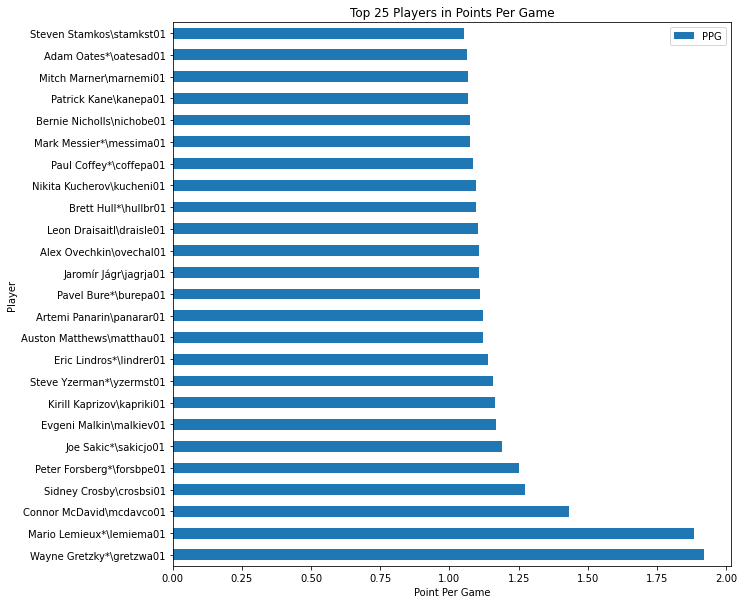

In [ ]:
#Top players in ppg 

sorted_ppg = skaters_df.sort_values("PPG", ascending=False)

sorted_ppg = sorted_ppg.iloc[:25]
sorted_ppg

sorted_ppg.plot.barh(x = "Player", y = "PPG", figsize = (10,10))
plt.title("Top 25 Players in Points Per Game")
plt.xlabel("Point Per Game")
plt.show()

Notable Current Players: Sidney Crosby, Auston Matthews, Artemi Panarin, Connor McDavid, Leon Draisatl, Nikita Kucherov, Patrick Kane, Mitch Marner, Evgeni Malkin 

Most Interesting: Kirill Kaprizov: Played 2 Years in the NHL

Retired NHL Players not in the HOF: Jaromir Jagr, Bernie Nicholls

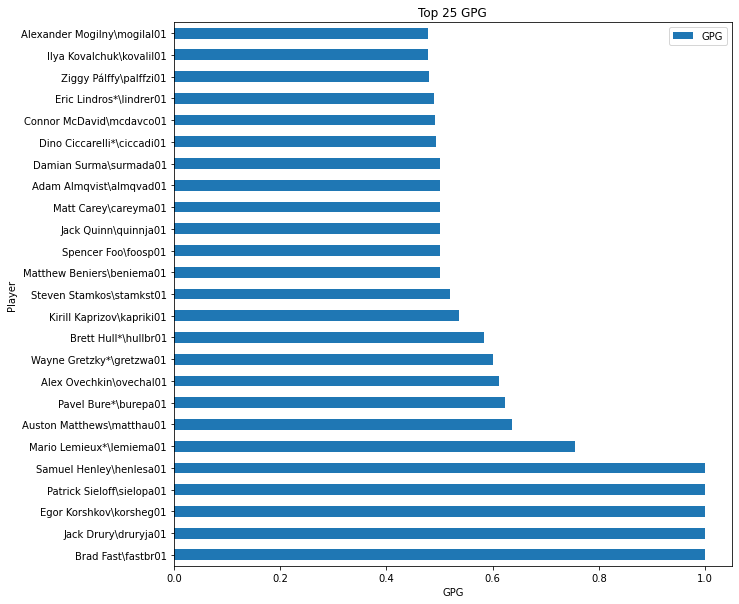

In [ ]:
sorted_gpg = skaters_df.sort_values("GPG", ascending=False)

sorted_gpg = sorted_gpg.iloc[:25]


sorted_gpg.plot.barh(x = "Player", y = "GPG", figsize = (10,10))
plt.title("Top 25 GPG")
plt.xlabel("GPG")
plt.show()


Graph Observations:
The top 5 players have scored in every nhl game they have appeared. Jack Drury has scored in two, while everyone else has scored in one.

Many non-hall of famers on this chart.

Potential Hall of Famers: Alex Ovechkin, Ilya Kovalchuck, and Connor McDavid
After some research many of these player have had shorted stints in the NHL making GPG not a very good stat for predicting Hall of Famers.

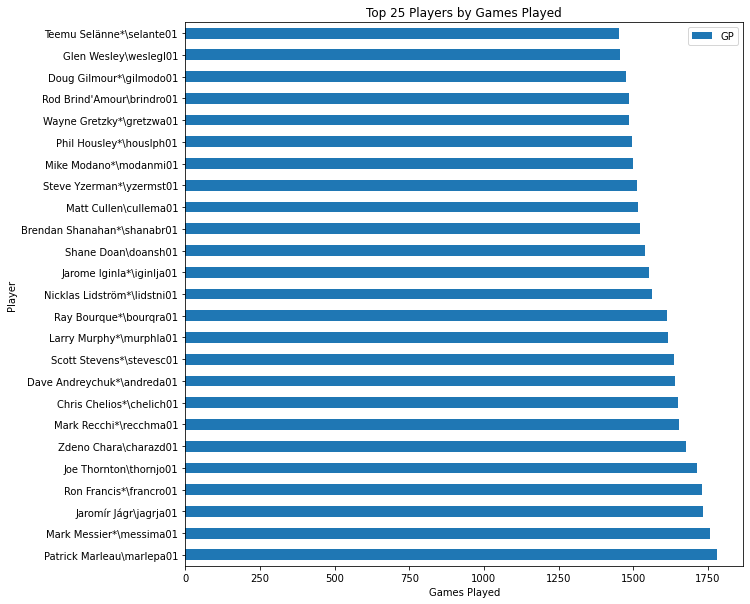

In [ ]:
sorted_GP = skaters_df.sort_values('GP', ascending= False)
sorted_GP = sorted_GP.iloc[:25]
sorted_GP.plot.barh(x= "Player", y = "GP", figsize = (10,10))
plt.title("Top 25 Players by Games Played")
plt.xlabel("Games Played")
plt.show()

These are the leagues Ironmen.

Patrick Marleau is a guranteed Hall of Famer for his longevity alone. 
Zdeno Chara is also a lock been many experts to be in the Hall of Fame.
Rod Brind'Amour not only had a long career, but now is a successful Coach in the NHL, however his career as a player most likely will put him in the Hall of Very Good.

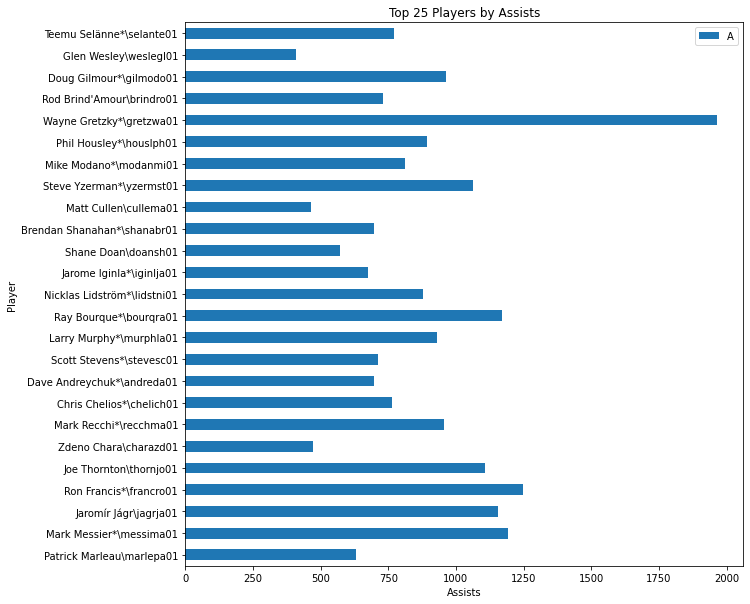

In [ ]:
sorted_A = skaters_df.sort_values('A', ascending= False)
sorted_A = sorted_A.iloc[:25]
sorted_GP.plot.barh(x= "Player", y = "A", figsize = (10,10))
plt.title("Top 25 Players by Assists")
plt.xlabel("Assists")
plt.show()

<Figure size 720x720 with 0 Axes>

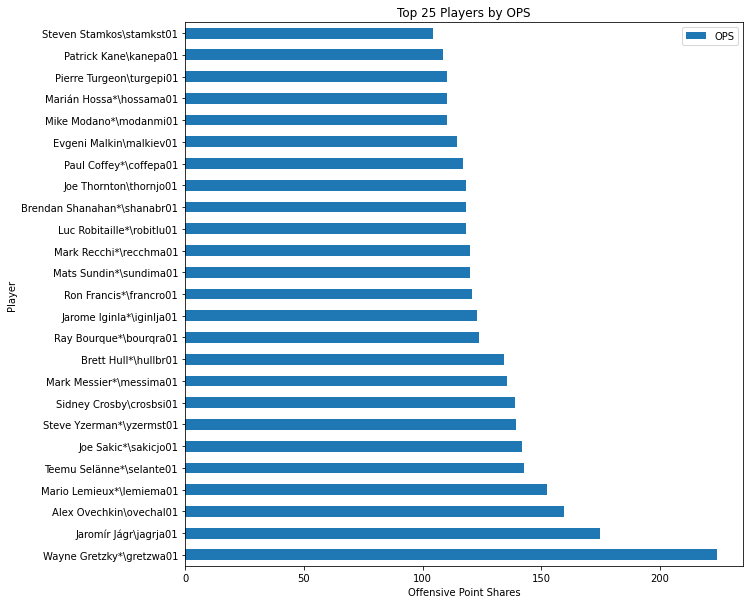

In [ ]:
plt.figure(figsize = (10,10))
sorted_OPS = skaters_df.sort_values('OPS', ascending= False)
sorted_OPS = sorted_OPS.iloc[:25]
sorted_OPS.plot.barh(x= 'Player', y = 'OPS', figsize = (10,10))
plt.title("Top 25 Players by OPS")
plt.xlabel("Offensive Point Shares")
plt.show()

Offensive Point Shares 
How many points generated by a team is because of one player.

I believe this is the best way to compare players who are current and retired. This statistic takes era into account.

Alex Ovechkin and Jaromir Jagr are 3rd and 2nd respectively showing their dominance during their career. 

All players on this list who are not Hall of Famers should be or will be in the Hall of Fame.

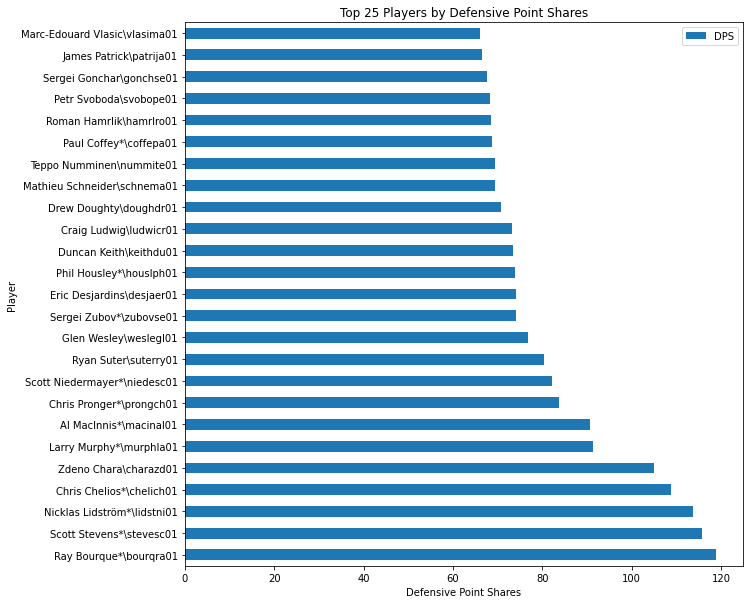

In [ ]:
sorted_DPS = skaters_df.sort_values('DPS', ascending= False)
sorted_DPS = sorted_DPS.iloc[:25]
sorted_DPS.plot.barh(x= 'Player', y = 'DPS', figsize = (10,10))
plt.title("Top 25 Players by Defensive Point Shares")
plt.xlabel("Defensive Point Shares")
plt.show()

Much like offensive point shares this takes into account how many points are generated by a players defense.

This statistic are extremly important as defensive statistics are quite few in hockey, thus this is the chance for the leagues best defenders to be recognized.

Many of these defenders will be considered for the hall of fame, but the tipping point is their offensive production. Examples of great defenders without the offensive production are Roman Hamrlik, James Patrick, and Craig Ludwig.

However, my noteable players are Chara, Ryan Suter, Drew Doughty, and Duncan Keith. Sergei Gonchar and Teppo Numminen are interesting shouts for retired players that should be inducted into the hall of fame at some point.

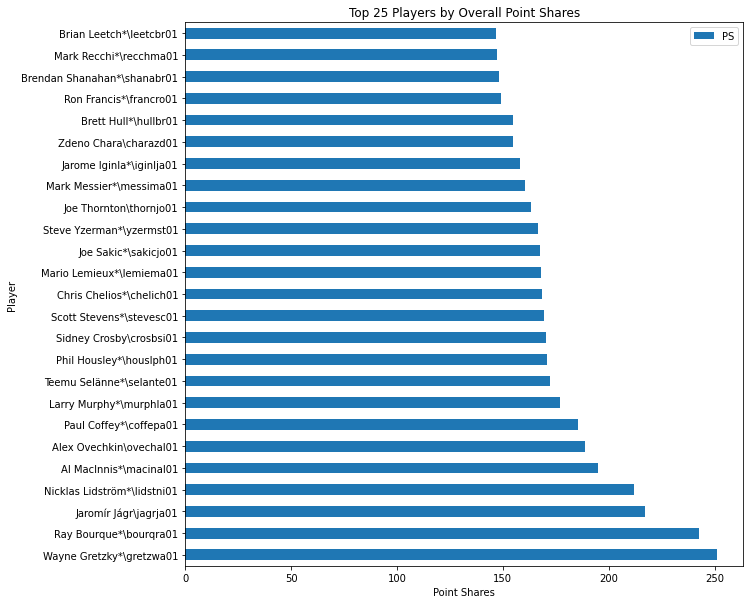

In [ ]:
sorted_PS = skaters_df.sort_values('PS', ascending= False)
sorted_PS = sorted_PS.iloc[:25]
sorted_PS.plot.barh(x= 'Player', y = 'PS', figsize = (10,10))
plt.title("Top 25 Players by Overall Point Shares")
plt.xlabel("Point Shares")
plt.show()

This is overall point shares that takes into account both offensive and defensive impact. 

Many returning players show up on this list such as Joe Thorton, Zdeno Chara, Sidney Crosby, and Alex Ovechkin 

Top 4 players except for Jack Drury have all played in one game and scored one goal 

jack Drury has played in two and has two goals

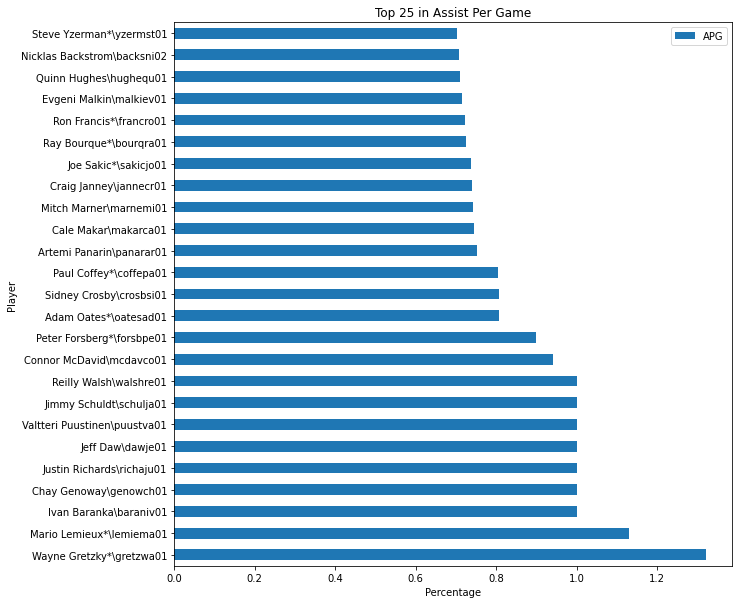

In [ ]:
sorted_apg = skaters_df.sort_values("APG", ascending=False)

sorted_apg = sorted_apg.iloc[:25]


sorted_apg.plot.barh(x = "Player", y = "APG", figsize = (10,10))
plt.title("Top 25 in Assist Per Game")
plt.xlabel("Percentage")
plt.show()

All players who averaged 1.0 Assists per game have only appeared in one game. This chart shows the greatness of Lemieux and Gretzky.

Other than many of the same returning players, Nicklas Backstrom appears on this list and is known as one of the best passers to ever play in the NHL.

Artemi Panarin, Mitch Marner, Cale Makar, and Quinn Highes are all skilled players, but are still very young in their careers. 

After doing some research, Craig Janney has had a fantastic career. He almost averaged a point a game during the course of his career. However, he never was an all star and never stood out among his peers. Hall of Very Good



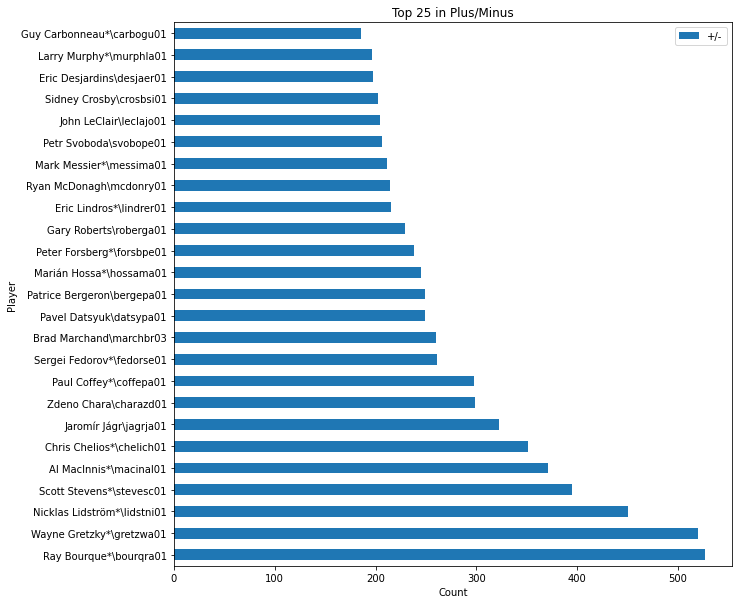

In [ ]:
sorted_plus_minus = skaters_df.sort_values("+/-", ascending=False)

sorted_plus_minus = sorted_plus_minus.iloc[:25]


sorted_plus_minus.plot.barh(x = "Player", y = "+/-", figsize= (10,10))
plt.title("Top 25 in Plus/Minus")
plt.xlabel("Count")
plt.show()

Plus/Minus is a statistic that can show great offensiev production or a great defensive player.

Patrice Bergeron appears on this list a fantastic all-around player. Gary Roberts is another fantastic player yet to make it in the hall of fame. This stat is intersting, but can be inflated by playing with other very good players.

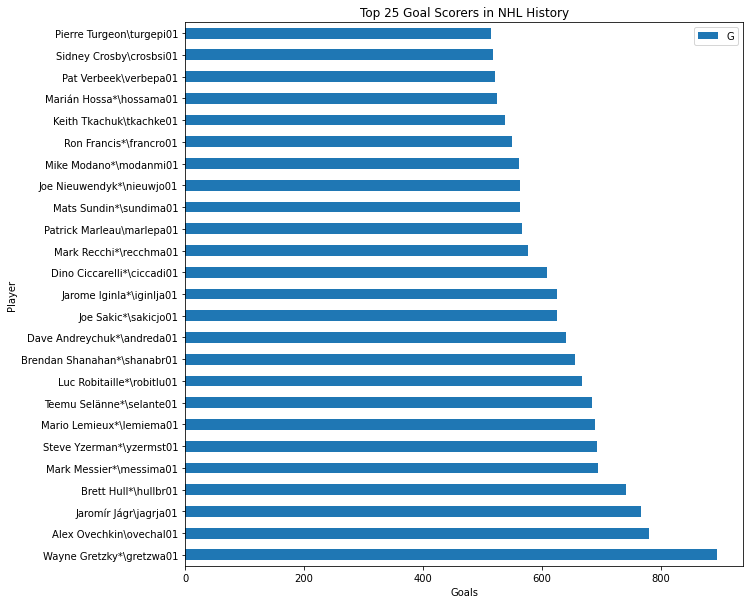

In [ ]:
sorted_goals = skaters_df.sort_values("G", ascending = False)

sorted_goals = sorted_goals.iloc[:25]
sorted_goals.plot.barh(x = "Player", y = "G", figsize = (10,10))
plt.title("Top 25 Goal Scorers in NHL History")
plt.xlabel("Goals")
plt.show()

Jagr, Turgeon, Tkachuck, and Marleau are the only retired players on this list who are not in the hall of fame. 



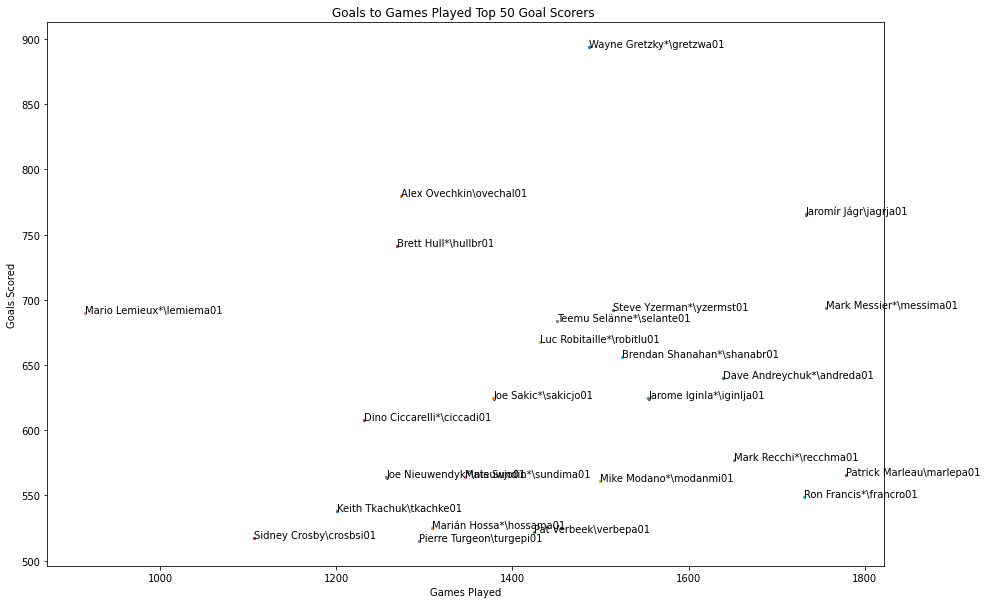

In [ ]:
plt.figure(figsize = (15,10))

for i, row in sorted_goals.iterrows():
  plt.scatter(row['GP'], row['G'], s = 5)

  plt.text(row['GP'], row["G"], row["Player"], size=10)
plt.title("Goals to Games Played Top 50 Goal Scorers ")
plt.xlabel("Games Played")
plt.ylabel("Goals Scored")
plt.show()

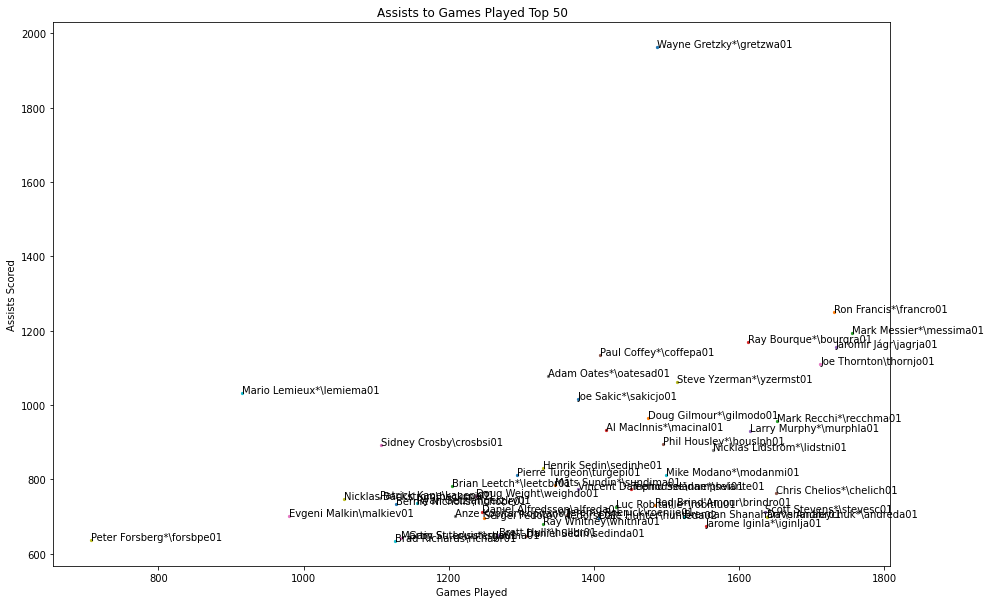

In [ ]:
sorted_assists = skaters_df.sort_values("A", ascending = False)

sorted_assists = sorted_assists.iloc[:50]

plt.figure(figsize = (15,10))

for i, row in sorted_assists.iterrows():
  plt.scatter(row['GP'], row['A'], s = 5)

  plt.text(row['GP'], row["A"], row["Player"], size=10)
plt.title("Assists to Games Played Top 50")
plt.xlabel("Games Played")
plt.ylabel("Assists Scored")
plt.show()

In [ ]:
sorted_points = skaters_df.sort_values("PTS", ascending = False)

sorted_points = sorted_points.iloc[:50]

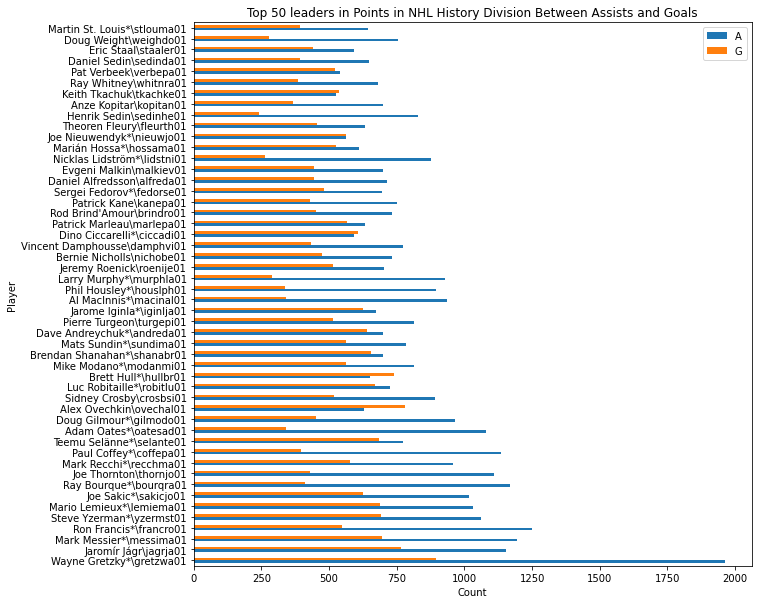

In [ ]:
sorted_points.plot.barh(x = 'Player', y = ["A", "G"], figsize = (10,10))
plt.title("Top 50 leaders in Points in NHL History Division Between Assists and Goals")
plt.xlabel("Count")
plt.show()

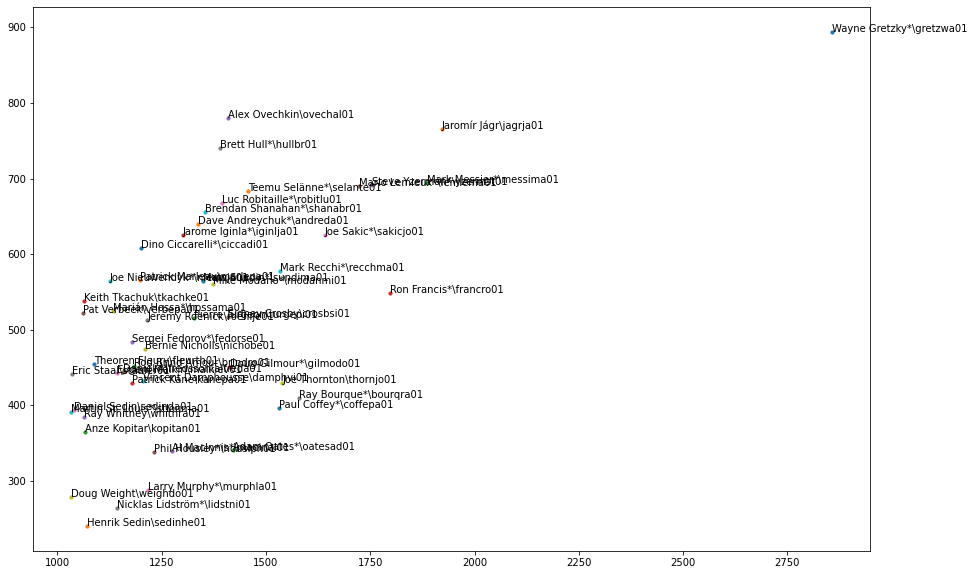

In [ ]:
plt.figure(figsize = (15,10))
for i, row in sorted_points.iterrows():
  plt.scatter(row['PTS'], row['G'], s = 10)
  plt.text(row['PTS'], row['G'], row['Player'], size = 10)

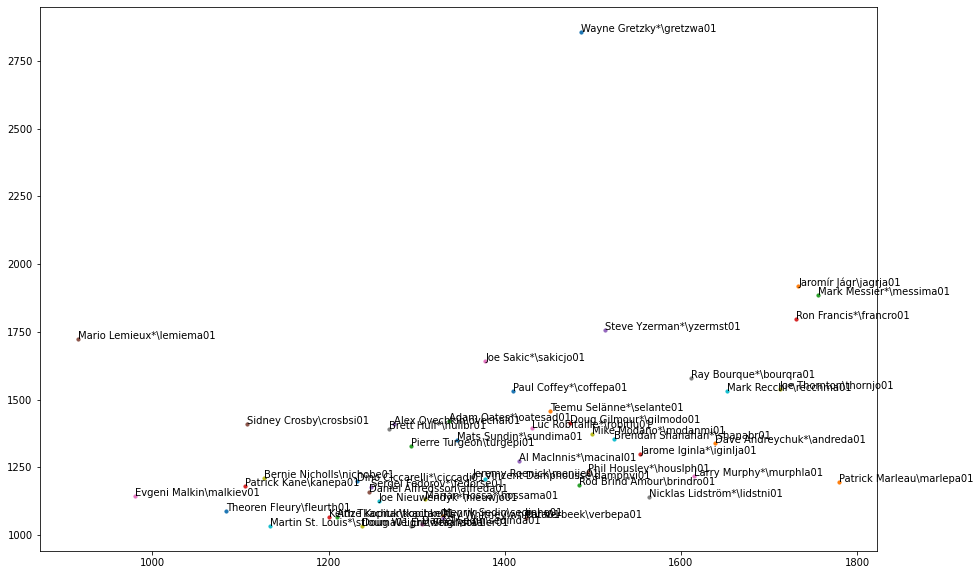

In [ ]:
plt.figure(figsize = (15,10))
for i, row in sorted_points.iterrows():
  plt.scatter(row['GP'], row['PTS'], s = 10)
  plt.text(row['GP'], row['PTS'], row['Player'], size = 10)

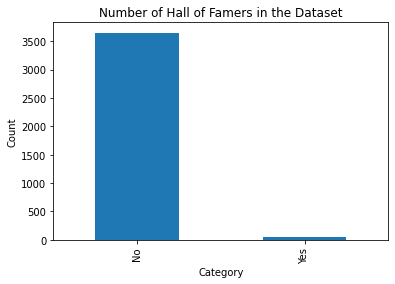

In [ ]:
hof_count = skaters_df["Hall of Fame"].value_counts()

hof_count.plot.bar()
plt.title("Number of Hall of Famers in the Dataset")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [ ]:
defenders = skaters_df['Pos_D'] == 1
defenders_df = skaters_df[defenders]
defenders_df.reset_index(inplace = True)

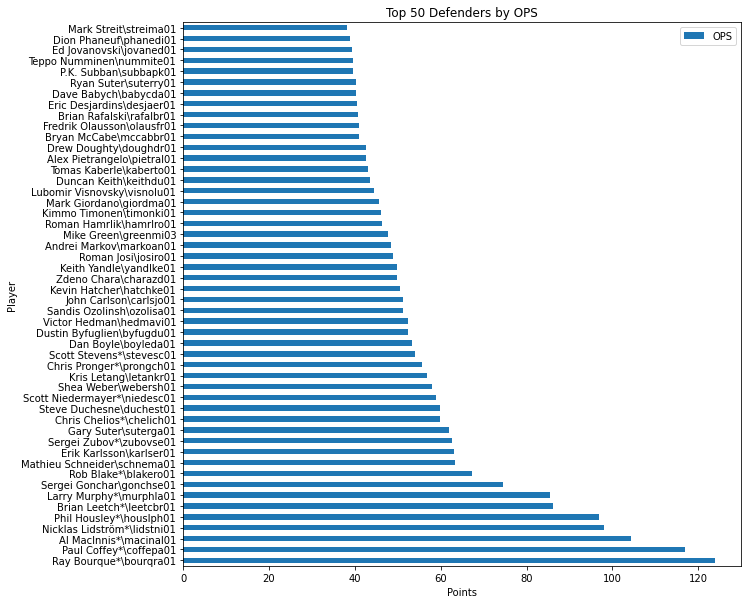

In [ ]:
best_offensive_D = defenders_df.sort_values("OPS", ascending= False).iloc[:50]
best_offensive_D.plot.barh(x = "Player", y = "OPS", figsize = (10,10))
plt.title("Top 50 Defenders by OPS")
plt.xlabel("Points")
plt.show()

Defenders typically score less than forwards, so I wanted to analyze these players independtly from the forwards. 

OPS will show the best offenive defenders from all eras.

Sergei Gonchar is clearly hall of fame snub in my opinion.

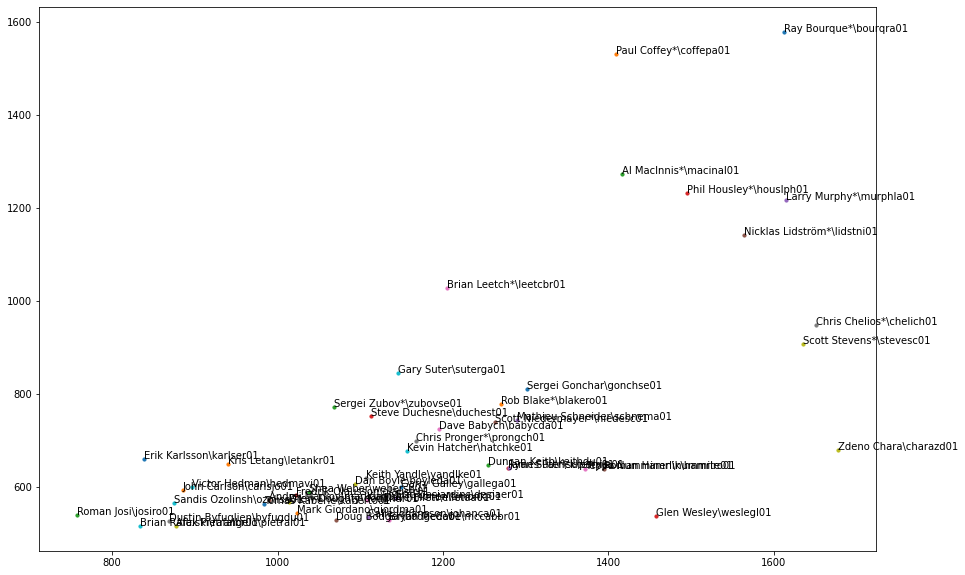

In [ ]:
best_offensive_D = defenders_df.sort_values("PTS", ascending= False).iloc[:50]

plt.figure(figsize = (15,10))
for i, row in best_offensive_D.iterrows():
  plt.scatter(row['GP'], row['PTS'], s = 10)
  plt.text(row['GP'], row['PTS'], row['Player'], size = 10)

After observing this graph very few of the top defenders in points have been selected to the hall of fame. It is clear defenders do not get the same representation in the hall of fame as the forwards 

In [ ]:
#training_data 
retired = skaters_df["To"] != 2022
retired_df = skaters_df[retired]

#Data that will be tested 
current = skaters_df['To'] == 2022
current_df = skaters_df[current]


In [ ]:
X = retired_df.drop(columns=['Player','From', 'To', 'Hall of Fame'])
y = retired_df['Hall of Fame']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

Xtrain = ((Xtrain - Xtrain.min())/(Xtrain.max() - Xtrain.min()))
Xtest = ((Xtest - Xtest.min())/(Xtest.max() - Xtest.min()))

Xtrain = Xtrain.fillna(0)
Xtest = Xtest.fillna(0)

Xtrain.shape

(2161, 40)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric="manhattan", weights="uniform")
model.fit(Xtrain, ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report

ypred = model.predict(Xtest)
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99       523
         Yes       1.00      0.61      0.76        18

    accuracy                           0.99       541
   macro avg       0.99      0.81      0.88       541
weighted avg       0.99      0.99      0.99       541



In [ ]:
from sklearn.model_selection import GridSearchCV
#param_grid = {'n_neighbors': np.arange(1, 51),
#              'metric': ['euclidean', "manhattan"],
#              'weights': ['uniform', 'distance']}
#grid = GridSearchCV(model, param_grid, cv=5, verbose=1)

#grid.fit(Xtrain, ytrain)
#print(grid.best_params_)

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.7,
                max_depth = 5, alpha = 10, n_estimators = 15)

In [ ]:
xg.fit(Xtrain, ytrain)

ypred = xg.predict(Xtest)
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       506
         Yes       0.82      0.26      0.39        35

    accuracy                           0.95       541
   macro avg       0.88      0.63      0.68       541
weighted avg       0.94      0.95      0.94       541



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth= 2, random_state=18)

tree.fit(Xtrain, ytrain)
ypred = tree.predict(Xtest)

print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

          No       0.93      1.00      0.96       493
         Yes       0.82      0.19      0.31        48

    accuracy                           0.92       541
   macro avg       0.87      0.59      0.63       541
weighted avg       0.92      0.92      0.90       541



In [ ]:
#param_grid = {'max_depth': np.arange(1,21),
 #             'random_state': np.arange(1,21)
#}
#grid = GridSearchCV(tree, param_grid, cv=5, verbose=1)

#grid.fit(Xtrain, ytrain)
#print(grid.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=4, random_state=9)
forest.fit(Xtrain, ytrain)
ypred = forest.predict(Xtest)

print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99       521
         Yes       0.91      0.50      0.65        20

    accuracy                           0.98       541
   macro avg       0.95      0.75      0.82       541
weighted avg       0.98      0.98      0.98       541



In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol = 1e-2, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)


print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

          No       1.00      0.99      1.00       531
         Yes       0.73      0.80      0.76        10

    accuracy                           0.99       541
   macro avg       0.86      0.90      0.88       541
weighted avg       0.99      0.99      0.99       541



In [ ]:
#param_grid = {'max_depth': np.arange(1,11),
         #     'random_state': np.arange(1,11)
#}
#grid = GridSearchCV(forest, param_grid, cv=5, verbose=1)

#grid.fit(Xtrain, ytrain)
#print(grid.best_params_)

In [ ]:
#train with all retired players 
Xtrain = X
ytrain = y

Xtrain = ((Xtrain - Xtrain.min())/(Xtrain.max() - Xtrain.min()))


Xtrain = Xtrain.fillna(0)


In [ ]:
Xtest = current_df.drop(columns=['Player','From', 'To', 'Hall of Fame'])
Xtest = ((Xtest - Xtest.min())/(Xtest.max() - Xtest.min()))
Xtest = Xtest.fillna(0)

In [ ]:
#knn test
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

df = pd.DataFrame()

df["Player"] = current_df.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers])

                         Player Hall of Fame
64   Patrice Bergeron\bergepa01          Yes
116       Brent Burns\burnsbr01          Yes
126      John Carlson\carlsjo01          Yes
133       Jeff Carter\carteje01          Yes
141       Zdeno Chara\charazd01          Yes
179     Sidney Crosby\crosbsi01          Yes
216      Drew Doughty\doughdr01          Yes
219    Leon Draisaitl\draisle01          Yes
311      Ryan Getzlaf\getzlry01          Yes
312     Mark Giordano\giordma01          Yes
315     Claude Giroux\giroucl01          Yes
371     Victor Hedman\hedmavi01          Yes
438         Roman Josi\josiro01          Yes
448       Patrick Kane\kanepa01          Yes
451     Erik Karlsson\karlser01          Yes
460      Duncan Keith\keithdu01          Yes
481      Anze Kopitar\kopitan01          Yes
529       Kris Letang\letankr01          Yes
563  Nathan MacKinnon\mackina01          Yes
567     Evgeni Malkin\malkiev01          Yes
597    Connor McDavid\mcdavco01          Yes
679     Al

KNN proved to be very accurate during my test and these final results cannot be disputed. There are very few players in this list who will not make the Hall of Fame. Jonathan Toews and Erik Karlsson are the only players I believe can be disputed.

In [ ]:
train_test = Xtrain
train_test["Player"] = retired_df['Player'].values

Xtrain = Xtrain.drop(columns = ['Player'])

In [ ]:
#training prediction observation
ypred = model.predict(Xtrain)

df = pd.DataFrame()


df["Player"] = train_test.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers])

                            Player Hall of Fame
23     Daniel Alfredsson\alfreda01          Yes
41      Dave Andreychuk*\andreda01          Yes
245         Ray Bourque*\bourqra01          Yes
380       Chris Chelios*\chelich01          Yes
418         Paul Coffey*\coffepa01          Yes
664      Sergei Fedorov*\fedorse01          Yes
711      Peter Forsberg*\forsbpe01          Yes
718         Ron Francis*\francro01          Yes
785        Doug Gilmour*\gilmodo01          Yes
846       Wayne Gretzky*\gretzwa01          Yes
999        Marián Hossa*\hossama01          Yes
1004       Phil Housley*\houslph01          Yes
1015          Brett Hull*\hullbr01          Yes
1031      Jarome Iginla*\iginlja01          Yes
1044         Jaromír Jágr\jagrja01          Yes
1335       Brian Leetch*\leetcbr01          Yes
1350      Mario Lemieux*\lemiema01          Yes
1369   Nicklas Lidström*\lidstni01          Yes
1425        Al MacInnis*\macinal01          Yes
1555       Mark Messier*\messima01      

Daniel Alfredsson, Jagr, and Roenick 

All have a case for the Hall of Fame. Jagr is one of the best players to play and will be a hall of famer once he retires from international play.

In [ ]:
#XG test

xg.fit(Xtrain, ytrain)
ypred = xg.predict(Xtest)

df = pd.DataFrame()

df["Player"] = current_df.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers].to_string())

                           Player Hall of Fame
5           Sebastian Aho\ahose01          Yes
28    Nicklas Backstrom\backsni02          Yes
37    Aleksander Barkov\barkoal01          Yes
39         Tyson Barrie\barrity01          Yes
42        Mathew Barzal\barzama01          Yes
57      Matthew Beniers\beniema01          Yes
58            Jamie Benn\bennja01          Yes
64     Patrice Bergeron\bergepa01          Yes
81           Matt Boldy\boldyma01          Yes
126        John Carlson\carlsjo01          Yes
133         Jeff Carter\carteje01          Yes
141         Zdeno Chara\charazd01          Yes
169         Kyle Connor\connoky01          Yes
174      Sean Couturier\coutuse01          Yes
179       Sidney Crosby\crosbsi01          Yes
198      Alex DeBrincat\debrial01          Yes
216        Drew Doughty\doughdr01          Yes
219      Leon Draisaitl\draisle01          Yes
222          Jack Drury\druryja01          Yes
240         Jack Eichel\eicheja01          Yes
280      Fili

XG Boost predicted nearly every star player currently as an all-star. However, there are players that were not predicted by KNN that most likely will be in the hall of fame. 
Example Auston Matthews, Sebastian Aho, Jamie Benn, and Phill Kessel just to name a few. 

In [ ]:
ypred = xg.predict(Xtrain)

df = pd.DataFrame()


df["Player"] = train_test.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers])

                            Player Hall of Fame
41      Dave Andreychuk*\andreda01          Yes
191           Rob Blake*\blakero01          Yes
245         Ray Bourque*\bourqra01          Yes
309           Pavel Bure*\burepa01          Yes
348      Guy Carbonneau*\carbogu01          Yes
380       Chris Chelios*\chelich01          Yes
396     Dino Ciccarelli*\ciccadi01          Yes
418         Paul Coffey*\coffepa01          Yes
664      Sergei Fedorov*\fedorse01          Yes
711      Peter Forsberg*\forsbpe01          Yes
718         Ron Francis*\francro01          Yes
785        Doug Gilmour*\gilmodo01          Yes
846       Wayne Gretzky*\gretzwa01          Yes
999        Marián Hossa*\hossama01          Yes
1004       Phil Housley*\houslph01          Yes
1015          Brett Hull*\hullbr01          Yes
1031      Jarome Iginla*\iginlja01          Yes
1126        Paul Kariya*\kariypa01          Yes
1304      Igor Larionov*\larioig01          Yes
1335       Brian Leetch*\leetcbr01      

Most interestingly XG Boost did not predict any players that are not in the Hall of Fame after predicitng a large amount of players to be hall of famers in the current test set. 

In [ ]:
#tree

tree.fit(Xtrain, ytrain)
ypred = tree.predict(Xtest)

df = pd.DataFrame()

df["Player"] = current_df.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers])

                         Player Hall of Fame
64   Patrice Bergeron\bergepa01          Yes
116       Brent Burns\burnsbr01          Yes
141       Zdeno Chara\charazd01          Yes
179     Sidney Crosby\crosbsi01          Yes
216      Drew Doughty\doughdr01          Yes
311      Ryan Getzlaf\getzlry01          Yes
448       Patrick Kane\kanepa01          Yes
460      Duncan Keith\keithdu01          Yes
481      Anze Kopitar\kopitan01          Yes
529       Kris Letang\letankr01          Yes
567     Evgeni Malkin\malkiev01          Yes
574     Brad Marchand\marchbr03          Yes
694      Joe Pavelski\paveljo01          Yes
859      Jason Spezza\spezzja01          Yes
864    Steven Stamkos\stamkst01          Yes
890        Ryan Suter\suterry01          Yes
909      Joe Thornton\thornjo01          Yes


A smaller amount than the previous two classifiers. However, all these players will be hall of famers. Decision Trees seemed to not be designed by Capitals fans as Alex Ovechkin is not on this prediciton. 

In [ ]:
#Decision tree training predictions
ypred = tree.predict(Xtrain)

df = pd.DataFrame()


df["Player"] = train_test.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers])

                            Player Hall of Fame
245         Ray Bourque*\bourqra01          Yes
380       Chris Chelios*\chelich01          Yes
418         Paul Coffey*\coffepa01          Yes
718         Ron Francis*\francro01          Yes
809       Sergei Gonchar\gonchse01          Yes
846       Wayne Gretzky*\gretzwa01          Yes
999        Marián Hossa*\hossama01          Yes
1004       Phil Housley*\houslph01          Yes
1015          Brett Hull*\hullbr01          Yes
1031      Jarome Iginla*\iginlja01          Yes
1335       Brian Leetch*\leetcbr01          Yes
1350      Mario Lemieux*\lemiema01          Yes
1369   Nicklas Lidström*\lidstni01          Yes
1425        Al MacInnis*\macinal01          Yes
1555       Mark Messier*\messima01          Yes
1592        Mike Modano*\modanmi01          Yes
1648       Larry Murphy*\murphla01          Yes
1697  Scott Niedermayer*\niedesc01          Yes
1928      Chris Pronger*\prongch01          Yes
1976        Mark Recchi*\recchma01      

Just like XG Boost no non-hall of famers were predicted. This being said many were missed.

In [ ]:
#forest test
forest.fit(Xtrain, ytrain)
ypred = forest.predict(Xtest)

df = pd.DataFrame()

df["Player"] = current_df.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers])

                          Player Hall of Fame
28   Nicklas Backstrom\backsni02          Yes
58           Jamie Benn\bennja01          Yes
64    Patrice Bergeron\bergepa01          Yes
116        Brent Burns\burnsbr01          Yes
133        Jeff Carter\carteje01          Yes
141        Zdeno Chara\charazd01          Yes
179      Sidney Crosby\crosbsi01          Yes
216       Drew Doughty\doughdr01          Yes
311       Ryan Getzlaf\getzlry01          Yes
315      Claude Giroux\giroucl01          Yes
371      Victor Hedman\hedmavi01          Yes
448        Patrick Kane\kanepa01          Yes
451      Erik Karlsson\karlser01          Yes
460       Duncan Keith\keithdu01          Yes
467        Phil Kessel\kesseph01          Yes
481       Anze Kopitar\kopitan01          Yes
529        Kris Letang\letankr01          Yes
567      Evgeni Malkin\malkiev01          Yes
574      Brad Marchand\marchbr03          Yes
597     Connor McDavid\mcdavco01          Yes
679      Alex Ovechkin\ovechal01  

Random Forests proved to be my second favorite predictor as the results are hard to dispute. Some notable additions are Blake Wheeler and Nicklas Backstrom.
These are fringe hall of famers, but mant will agree on this prediction.

In [ ]:
ypred = forest.predict(Xtrain)

df = pd.DataFrame()


df["Player"] = train_test.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers])

                            Player Hall of Fame
41      Dave Andreychuk*\andreda01          Yes
191           Rob Blake*\blakero01          Yes
245         Ray Bourque*\bourqra01          Yes
380       Chris Chelios*\chelich01          Yes
396     Dino Ciccarelli*\ciccadi01          Yes
418         Paul Coffey*\coffepa01          Yes
664      Sergei Fedorov*\fedorse01          Yes
711      Peter Forsberg*\forsbpe01          Yes
718         Ron Francis*\francro01          Yes
785        Doug Gilmour*\gilmodo01          Yes
846       Wayne Gretzky*\gretzwa01          Yes
999        Marián Hossa*\hossama01          Yes
1004       Phil Housley*\houslph01          Yes
1015          Brett Hull*\hullbr01          Yes
1031      Jarome Iginla*\iginlja01          Yes
1335       Brian Leetch*\leetcbr01          Yes
1350      Mario Lemieux*\lemiema01          Yes
1369   Nicklas Lidström*\lidstni01          Yes
1425        Al MacInnis*\macinal01          Yes
1555       Mark Messier*\messima01      

No non hall of famers are predicted by a random forest.

In [ ]:
# Perceptron Test
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

df = pd.DataFrame()

df["Player"] = current_df.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers].to_string())

                            Player Hall of Fame
5            Sebastian Aho\ahose01          Yes
28     Nicklas Backstrom\backsni02          Yes
37     Aleksander Barkov\barkoal01          Yes
58             Jamie Benn\bennja01          Yes
64      Patrice Bergeron\bergepa01          Yes
116          Brent Burns\burnsbr01          Yes
126         John Carlson\carlsjo01          Yes
133          Jeff Carter\carteje01          Yes
141          Zdeno Chara\charazd01          Yes
173        Logan Couture\coutulo01          Yes
179        Sidney Crosby\crosbsi01          Yes
216         Drew Doughty\doughdr01          Yes
219       Leon Draisaitl\draisle01          Yes
280       Filip Forsberg\forsbfi01          Yes
302      Johnny Gaudreau\gaudrjo01          Yes
311         Ryan Getzlaf\getzlry01          Yes
312        Mark Giordano\giordma01          Yes
315        Claude Giroux\giroucl01          Yes
371        Victor Hedman\hedmavi01          Yes
376        Adam Henrique\henriad01      

Just like XG Boost this classifeier includes almost all extremely talented players. However, many of these players deserve consideration

In [ ]:
ypred = clf.predict(Xtrain)

df = pd.DataFrame()


df["Player"] = train_test.Player.values

df["Hall of Fame"] = ypred

Hall_of_Famers = df['Hall of Fame'] == "Yes"

print(df[Hall_of_Famers].to_string())

                            Player Hall of Fame
23     Daniel Alfredsson\alfreda01          Yes
41      Dave Andreychuk*\andreda01          Yes
58          Jason Arnott\arnotja01          Yes
143        Brian Bellows\bellobr01          Yes
191           Rob Blake*\blakero01          Yes
245         Ray Bourque*\bourqra01          Yes
274      Rod Brind'Amour\brindro01          Yes
309           Pavel Bure*\burepa01          Yes
380       Chris Chelios*\chelich01          Yes
396     Dino Ciccarelli*\ciccadi01          Yes
418         Paul Coffey*\coffepa01          Yes
497   Vincent Damphousse\damphvi01          Yes
506        Pavel Datsyuk\datsypa01          Yes
587       Steve Duchesne\duchest01          Yes
618         Patrik Elias\eliaspa01          Yes
664      Sergei Fedorov*\fedorse01          Yes
699       Theoren Fleury\fleurth01          Yes
711      Peter Forsberg*\forsbpe01          Yes
718         Ron Francis*\francro01          Yes
785        Doug Gilmour*\gilmodo01      

I find the perceptron models prediction of the tranining data to be most interesting.

Because it shows many players that should be in the hall of fame that havent been included. 

In [ ]:
#Clustering for fun

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans = KMeans(n_clusters = 10)

kmeans.fit(skaters_df.drop(columns= ["Player", "Hall of Fame"]))

labels = kmeans.predict(skaters_df.drop(columns= ["Player", "Hall of Fame"]))

In [ ]:
skaters_df.reset_index(inplace = True)

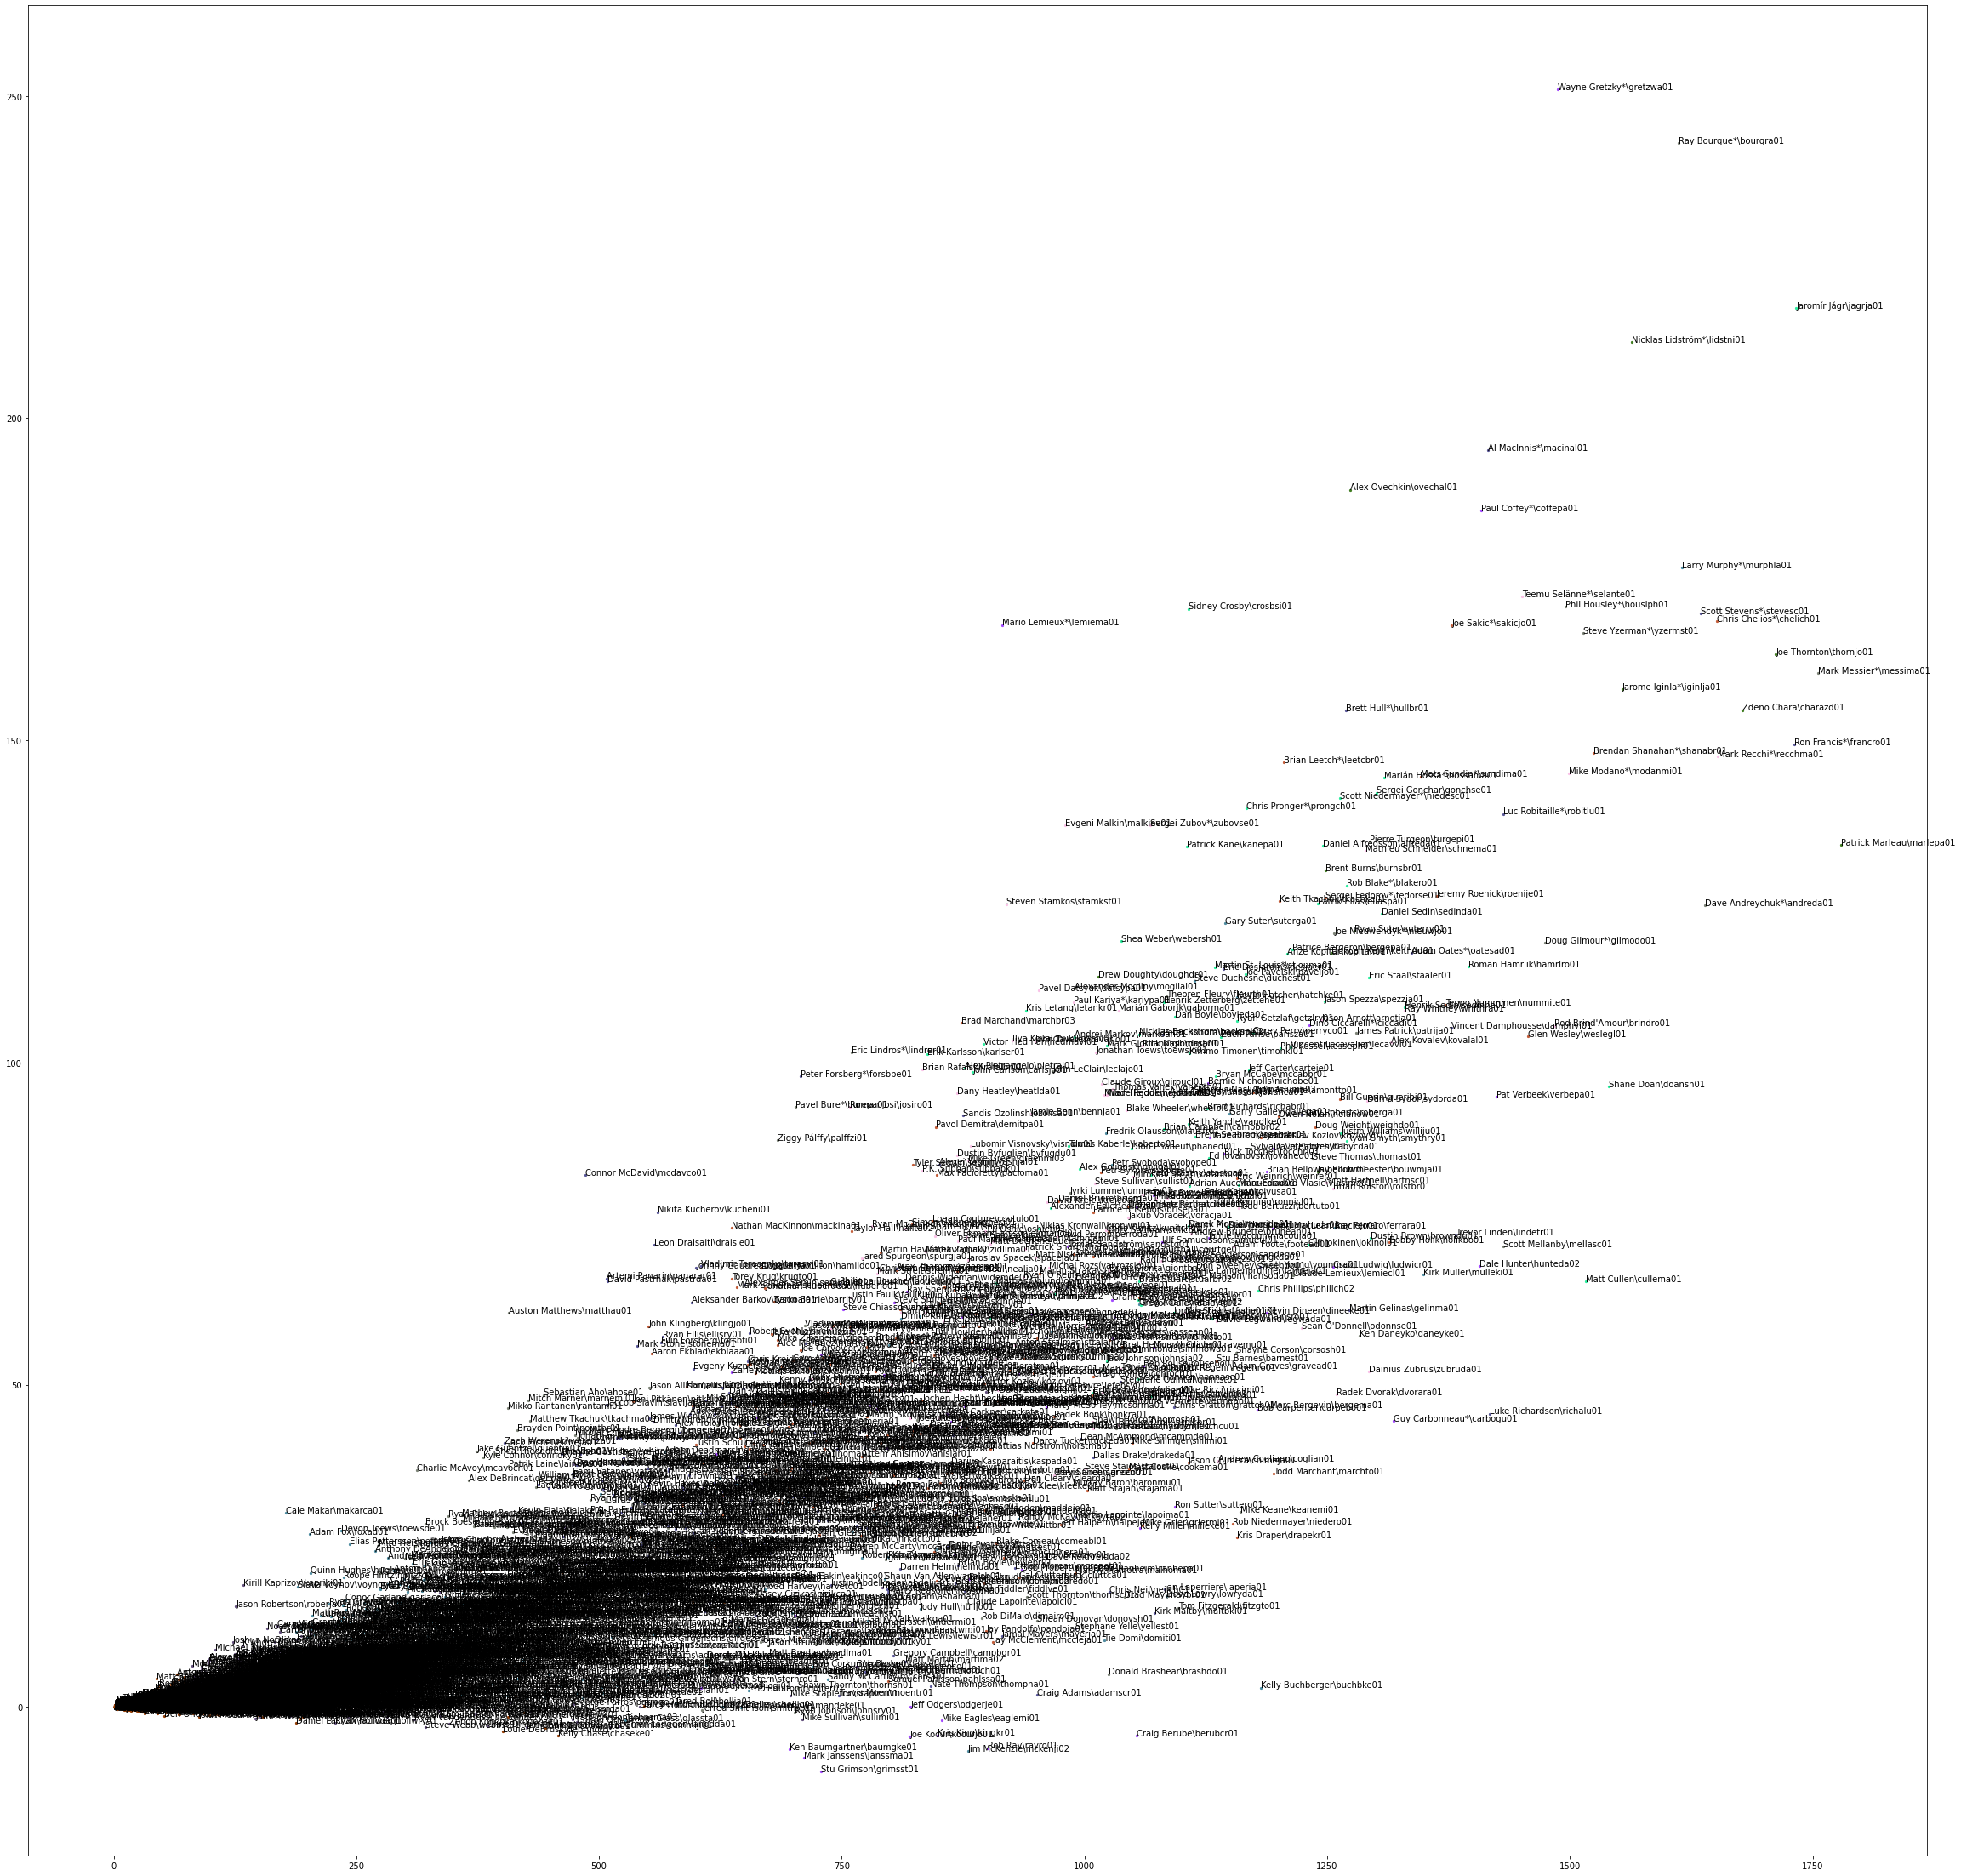

In [ ]:
colors =  ['#4E8CA1', '#F9C1E7', '#933D05', '#595697', '#417D22', '#7D8377', '#624F7B', '#C25D39', '#A24AFD', '#2AED9E']
plt.figure(figsize=(40, 40))

for i, row in skaters_df.iterrows():

  curr_label = labels[i]

  curr_color = colors[curr_label]

  plt.scatter(row['GP'], row['PS'], c =curr_color, s = 5)

  plt.text(row['GP'], row["PS"], row["Player"], size=10)


After creating this cluster it is hard to tell what each cluster is being grouped by as the sample size is too large. There are 3 or 4 groups that have players that are or could be considered hall of famers with no rhyme or reason to why they are grouped together.

In [ ]:
#Kmeans with current players

In [ ]:
kmeans = KMeans(n_clusters = 5)

kmeans.fit(current_df.drop(columns= ["Player", "Hall of Fame"]))

labels = kmeans.predict(current_df.drop(columns= ["Player", "Hall of Fame"]))

In [ ]:
current_df.reset_index(inplace=True)

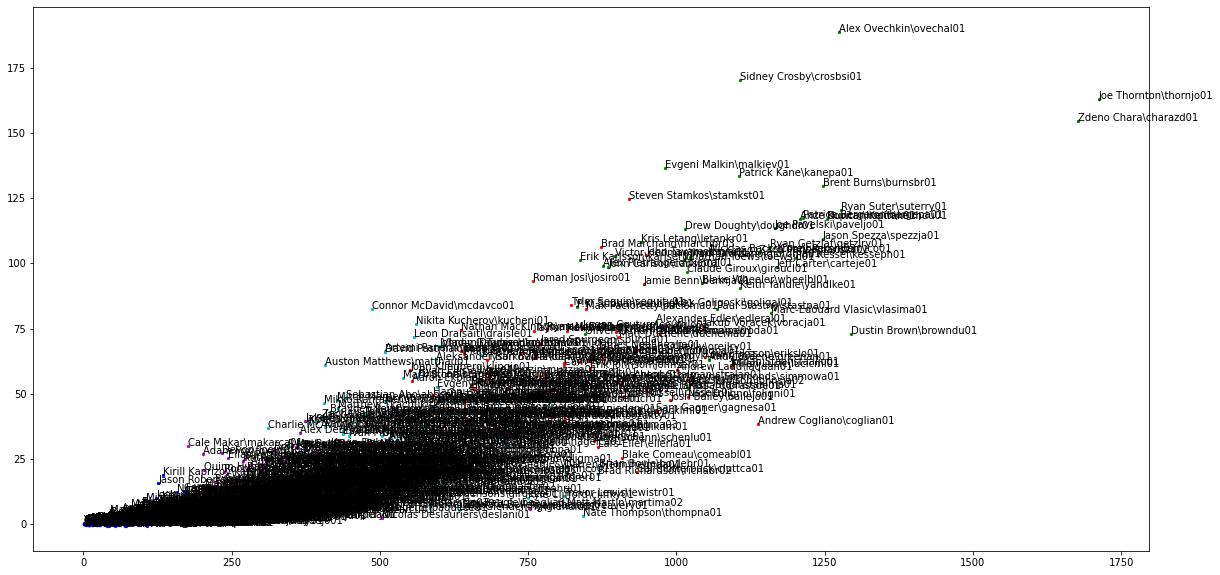

In [ ]:
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(20, 10))

for i, row in current_df.iterrows():

  curr_label = labels[i]

  curr_color = colors[curr_label]

  plt.scatter(row['GP'], row['PS'], c =curr_color, s = 5)

  plt.text(row['GP'], row["PS"], row["Player"], size=10)

Red: Experienced Consistant Players
Green: Tenured Stars *Almost all in this group can be considered future HoF
Purple: Current Productive Players
Teal: Young Players
Blue: Rookies

Red also has Hall of famers present in this cluster 